In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Impoting required packages
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score

In [4]:
# creating an object of the load_iris class as iris
iris = load_iris()

In [6]:
# Check the contents of the iris object
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [22]:
# Create a data frame object as data from the iris object
data = pd.DataFrame(iris.data, columns = iris.feature_names)

data['Target'] = iris.target

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
# Check the shape of the data frame object
data.shape # 150 rows and 5 columns

(150, 5)

In [24]:
# Check the column namaes of the data frame
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target'],
      dtype='object')

In [25]:
# Rename the first four columns of the data frame object
cols = {'sepal length (cm)':'SL', 'sepal width (cm)':'SW', 'petal length (cm)':'PL',
        'petal width (cm)':'PW'}

data.rename(columns = cols, inplace = True)
data.head()

,SL,SW,PL,PW,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
# Check the maximum values of the numerical columns
print('Max value of SL:', data.SL.max())
print('Max value of SW:', data.SW.max())
print('Max value of PL:', data.PL.max())
print('Max value of PW:', data.PW.max())

Max value of SL: 7.9
Max value of SW: 4.4
Max value of PL: 6.9
Max value of PW: 2.5


In [28]:
# Scaling all the above four columns in the range of 0 to 1
data.SL = data.SL/7.9
data.SW = data.SW/4.4
data.PL = data.PL/6.9
data.PW = data.PW/2.5

In [29]:
# Check the maximum values of the numerical columns after scaling
print('Max value of SL:', data.SL.max())
print('Max value of SW:', data.SW.max())
print('Max value of PL:', data.PL.max())
print('Max value of PW:', data.PW.max())

Max value of SL: 1.0
Max value of SW: 1.0
Max value of PL: 1.0
Max value of PW: 1.0


In [30]:
# Shuffling the data for better train test split
data = shuffle(data)
data.head()

,SL,SW,PL,PW,Target
54,0.822785,0.636364,0.666667,0.60,1
120,0.873418,0.727273,0.826087,0.92,2
39,0.645570,0.772727,0.217391,0.08,0
17,0.645570,0.795455,0.202899,0.12,0
50,0.886076,0.727273,0.681159,0.56,1


In [31]:
# Dividing the complete dataframe object into dependent and independent sets
X = data.drop('Target', axis = 1)
y = data.Target

In [32]:
# Train test split the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

print('The shape of X_train is:', X_train.shape)
print('The shape of y_train is:', y_train.shape)
print('The shape of X_test is:', X_test.shape)
print('The shape of y_test is:', y_test.shape)

The shape of X_train is: (120, 4)
The shape of y_train is: (120,)
The shape of X_test is: (30, 4)
The shape of y_test is: (30,)


In [33]:
# Defie multiple models with their hyper-parameters
# Create a dictionary name models with key:value pairs
# Key: Model names and values are in tuples: model_class() followed by hyper-parameters

models = {
    'DecisionTree': (DecisionTreeClassifier(), {'max_depth': [3, 5, 10]}),
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [5, 10]}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]})
}

In [35]:
# Creatig an empty dictionary for storing model names
best_models = {}

# Loop through models and perform GridSearchCV
for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv = 5, scoring = 'accuracy', n_jobs = -1)
    grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_  # Store the best model
    print(f"Best model for {name}: {grid.best_params_}")

Best model for DecisionTree: {'max_depth': 3}
Best model for RandomForest: {'max_depth': 5, 'n_estimators': 50}
Best model for SVM: {'C': 10, 'kernel': 'rbf'}
Best model for KNN: {'n_neighbors': 7}


In [37]:
# Select the overall best model: Highest training accuracy

best_model_name = max(best_models, key=lambda name: accuracy_score(y_test, best_models[name].predict(X_test)))
best_model = best_models[best_model_name]

print(f"\nBest overall model: {best_model_name}")


Best overall model: KNN


In [39]:
# Check for model overfitting, underfitting or balanced fit

train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# The model is balanced fit

Train Accuracy: 0.9583
Test Accuracy: 1.0000


In [42]:
# Predict and evaluate
y_pred = best_model.predict(X_test)

# Check model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Check model f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Check model precision_score
precision = precision_score(y_test, y_pred, average = 'weighted')
print(f"Precision Score:{precision:.4f}")

Accuracy: 1.0000
F1 Score: 1.0000
Precision Score:1.0000


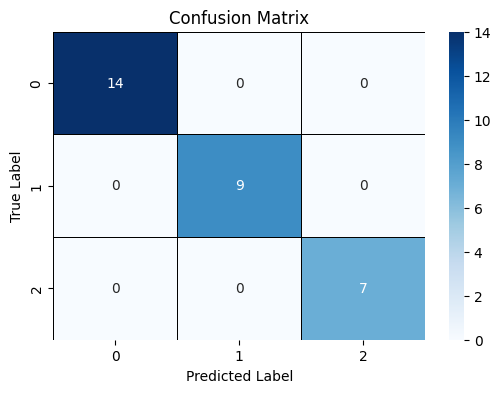

In [43]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, fmt = 'd', annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'black')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()